In [1]:
from keras.datasets import boston_housing

In [2]:
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

65536/57026 [==================================] - 0s 0us/step


In [3]:
train_data.shape, test_data.shape

((404, 13), (102, 13))

data normalization

In [4]:
mean=train_data.mean(axis=0)

In [5]:
train_data-=mean
std=train_data.std(axis=0)
train_data /=std

In [6]:
test_data -=mean
test_data /=std




In [7]:
from keras import models
from keras import layers
from keras import regularizers

In [8]:
# model=models.Sequential()
# model.add(layers.Dense(64, activation='relu', input_shape=(13,)))
# model.add(layers.Dense(64, activation='relu'))
# model.add(layers.Dense(1))

In [9]:
# model.compile(optimizer='rmsprop', 
#               loss='mse',
#               metrics=['mae'])

In [10]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_data.shape[1],),
                           kernel_regularizer=regularizers.l2(0.02)))
    model.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.02)))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

Given such a tiny training set - will apply a k-folder cross validation

In [11]:
import numpy as np

In [12]:
k=5
num_val_samples=len(train_data)//k

In [13]:
num_epochs=100
all_mae_history=[]

In [14]:
for i in range(k):
  print ('Folder: ', i)
  val_data=train_data[i*num_val_samples:(i+1)*num_val_samples]
  val_targets=train_targets[i*num_val_samples:(i+1)*num_val_samples]
  # #testing the numpy slice range
  # print("val:", i*num_val_samples, ":", (i+1)*num_val_samples)
  # print("train1:", " :", i * num_val_samples )
  # print("train2:", (i + 1) * num_val_samples, ":")
  
  partial_train_data=np.concatenate(
      [train_data[:i*num_val_samples],
      train_data[(i+1)*num_val_samples:]], axis=0)
  partial_train_targets=np.concatenate(
      [train_targets[:i*num_val_samples],
      train_targets[(i+1)*num_val_samples:]], axis=0)
  print("train_size:", len(partial_train_data))

  model=build_model()
  history=model.fit(partial_train_data, partial_train_targets,
            epochs=num_epochs, batch_size=1, verbose=0,
            validation_data=(val_data, val_targets))
  mae_history=history.history['val_mae']
  all_mae_history.append(mae_history)
  # val_mse, val_mae=model.evaluate(val_data, val_targets)
  # all_score.append(val_mae)
    

Folder:  0
train_size: 324
Folder:  1
train_size: 324
Folder:  2
train_size: 324
Folder:  3
train_size: 324
Folder:  4
train_size: 324


In [34]:
np.ndarray.mean(np.array(all_mae_history),  axis=1), np.ndarray.mean(np.array(all_mae_history))

(array([1.92224135, 2.68715669, 2.27422488, 2.70135185, 2.63765925]),
 2.4445268034935)

In [15]:
#average_mae_history = [np.mean([x[i] for x in all_mae_history]) for i in range(num_epochs)]

In [17]:
import matplotlib.pyplot as plt

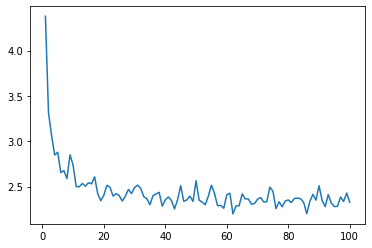

In [24]:
average_mae_history=np.ndarray.mean(np.array(all_mae_history),  axis=0)
plt.plot(range(1, num_epochs+1), average_mae_history)

Smooth the curve

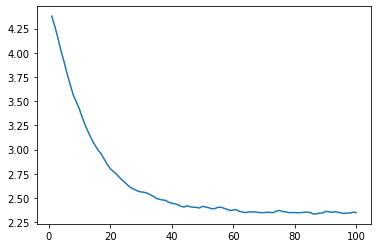

In [32]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points
smooth_mae_history = smooth_curve(average_mae_history)
plt.plot(range(1, len(smooth_mae_history)+1), smooth_mae_history)